In [2]:
import DSGRN
from DSGRN import *


import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from NsearchgoeQuery import *
from stats import *
from PhenotypeGraphviz import *
from PhenotypeGraphFun import *
from PhenotypeGraphFun_Gradient import *
from CondensationGraph_iter import *
from save_files import *

In [3]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_Fullconn.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_Fullconn") 
parameter_graph = ParameterGraph(network)

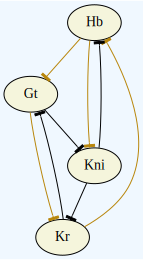

In [95]:
DrawGraph(network)

In [5]:
def get_paramslist_strict(database, pheno_pattern):
    c = database.conn.cursor()
    
    #Create a new MGA table of strictly monostable FP's, this is what we will use to find parameter index's
    set_of_MGIm = list(set([ row[0] for row in c.execute('select MorseGraphIndex, count(*) from MorseGraphAnnotations group by MorseGraphIndex') if row[-1]==1] ))
    sql = 'create temp table mono_MGI as select * from MorseGraphAnnotations where MorseGraphIndex in ({seq})'.format(seq = ','.join(['?']*len(set_of_MGIm)))
    c.execute(sql, set_of_MGIm )
    
    paramslist = []
    for i in range(len(pheno_pattern)):
        FPset = pheno_pattern[i]
        if len(FPset) == 1:
            MGIset = list(set([row[0] for row in c.execute('select * from mono_MGI where Label in (' + FPset[0] + ')' )]) )
        if len(FPset) == 2:
            MGIset = list(set([row[0] for row in c.execute('select * from mono_MGI where Label in (' + FPset[0] + ',' + FPset[1] + ')' )]) )
        if len(FPset) == 3:
            MGIset = list(set([row[0] for row in c.execute('select * from mono_MGI where Label in (' + FPset[0] + ',' + FPset[1] + ',' + FPset[2] + ')' )]) )
        if len(FPset) == 4:
            MGIset = list(set([row[0] for row in c.execute('select * from mono_MGI where Label in (' + FPset[0] + ',' + FPset[1] + ',' + FPset[2] + ',' + FPset[3] + ')' )]) )
            
        print(MGIset)
        string = 'select * from Signatures where MorseGraphIndex in ({seq})'.format(
            seq=','.join(['?'] * len(MGIset)))
        
        PGIset = list(set((i, row[0]) for row in c.execute(string, MGIset)))
        paramslist.append(PGIset)
    
    c.execute('drop table mono_MGI')
    return paramslist

In [92]:
AP35 = ['\'FP { 0, 2, 0, 0 }\'', '\'FP { 1, 2, 0, 0 }\'', '\'FP { 2, 2, 0, 0 }\'']
AP37 = ['\'FP { 2, 0, 0, 0 }\'', '\'FP { 2, 1, 0, 0 }\'', '\'FP { 2, 2, 0, 0 }\'']
AP40 = ['\'FP { 2, 0, 0, 0 }\'', '\'FP { 2, 0, 1, 0 }\'', '\'FP { 2, 0, 2, 0 }\'']
AP45 = ['\'FP { 0, 0, 2, 0 }\'', '\'FP { 1, 0, 2, 0 }\'', '\'FP { 2, 0, 2, 0 }\'']
AP51 = ['\'FP { 0, 0, 2, 0 }\'', '\'FP { 0, 0, 2, 1 }\'', '\'FP { 0, 0, 2, 2 }\'']
AP57 = ['\'FP { 0, 0, 0, 2 }\'', '\'FP { 0, 0, 1, 2 }\'', '\'FP { 0, 0, 2, 2 }\'']
AP63 = ['\'FP { 0, 0, 0, 2 }\'', '\'FP { 0, 1, 0, 2 }\'', '\'FP { 0, 2, 0, 2 }\'']
AP67 = ['\'FP { 0, 2, 0, 0 }\'', '\'FP { 0, 2, 0, 1 }\'', '\'FP { 0, 2, 0, 2 }\'']

Pheno_Pattern = [AP35, AP37, AP40, AP45, AP51, AP57, AP63, AP67]
paramslist_strict = get_paramslist_strict(database, Pheno_Pattern)

[8, 6, 7]
[8, 2, 5]
[2, 11, 29]
[27, 28, 29]
[441, 27, 132]
[336, 441, 373]
[336, 340, 748]
[251, 748, 6]


In [54]:
for i in paramslist_strict:
    print(len(i), (len(i)/694476)*100 )

91296 13.146026644549272
82323 11.853973355450728
91296 13.146026644549272
82323 11.853973355450728
91296 13.146026644549272
82323 11.853973355450728
91296 13.146026644549272
82323 11.853973355450728


In [7]:
main_edges_strict = get_phenotype_graph_parallel(database, paramslist_strict, 4)

Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/elizabeth/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/elizabeth/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/elizabeth/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/elizabeth/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/elizabeth/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/elizabeth/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/

In [53]:
len(main_edges_strict)

694476

In [ ]:
Path = find_a_path(main_edges_strict, paramslist_strict[0], paramslist_strict[-1], 8 )

In [90]:
main_edges_strict= load_json('Fullconn_main_edges_strict')

In [9]:
cond_og, redu_params_og, scc_og =  condensation_graph_optimized(main_edges_strict)

In [10]:
Paths_og = find_all_paths(cond_og, redu_params_og[0], redu_params_og[-1], 8, 100000 )

[(0, 120), (1, 6), (2, 6), (3, 2400), (4, 2400), (5, 48000), (6, 48000), (7, 120)]


In [13]:
Hb_data_og, Gt_data_og, Kr_data_og, Kni_data_og = Fullconn_get_data_scc(database, Paths_og, scc_og)

In [14]:
Full_list = {0: ['00'], 1:['40'], 2:['44','50','C0' ], 3: ['54','C4','D0'], 4: ['55','D4','CC','F0'], 5: ['D5','DC','F4'], 6: ['DD','F5','FC'], 7: ['FD'], 8:['FF']}

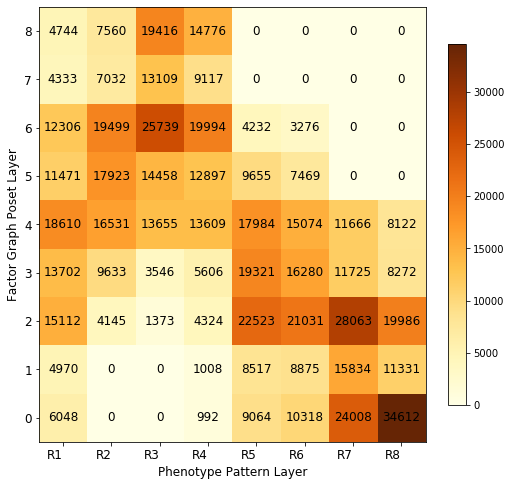

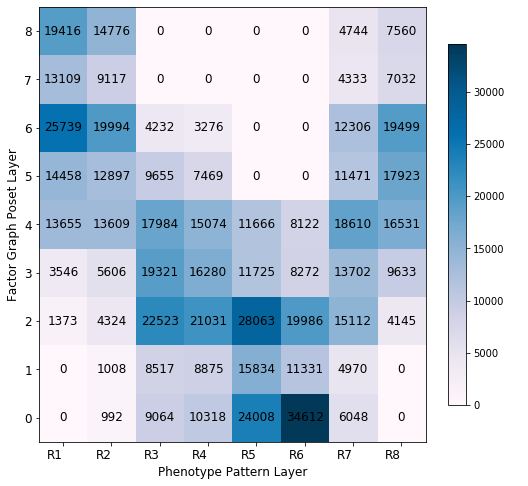

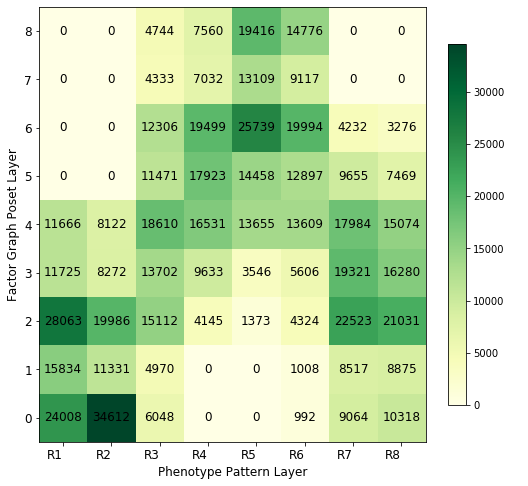

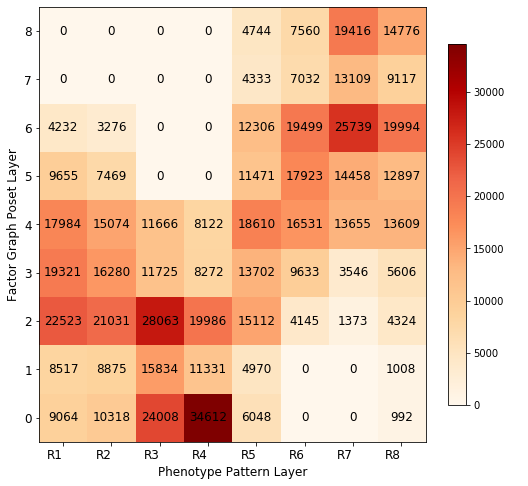

In [51]:
plot(Hb_data_og, Full_list, 12,12, "YlOrBr"), 
plot(Gt_data_og, Full_list, 12,12, "PuBu"), 
plot(Kr_data_og, Full_list, 12,12, "YlGn"), 
plot(Kni_data_og, Full_list, 20,12, "OrRd")

### Hb Gradient

In [16]:
Hb_gradient_edges = add_phenotype_Hb_gradient(database, main_edges_strict, Full_list, Full_list)

In [54]:
len(Hb_gradient_edges)

NameError: name 'Hb_gradient_edges' is not defined

In [17]:
cond_Hb, redu_params_Hb, scc_Hb =  condensation_graph_optimized(Hb_gradient_edges)

In [55]:
cond_Hb = load_json('cond_Hb_gradient_main_edges_strict_f')

In [56]:
with open('redu_params_Hb_gradient_main_edges_strict_f') as f:
    redu_params_Hb = json.load(f)

In [57]:
redu_params_Hb_new = []
for i in redu_params_Hb:
    n = [(m[0], m[1]) for m in i]
    redu_params_Hb_new.append(n)

In [58]:
scc_Hb = load_json_scc('scc_Hb_gradient_main_edges_strict_f')

In [59]:
final_cond_dict_Hb, new_paramslist_Hb, del_list_Hb = cond_h2l_Hb_gradient(database, cond_Hb, redu_params_Hb_new)

Remember to change phenotype layer numb if needed


In [98]:
PhenotypeGraphviz(database, network, final_cond_dict_Hb, 'png', 'f')

In [97]:
import graphviz
from DSGRN._dsgrn import *

class PhenotypeGraphviz:
  def __init__(self, database, network, edges, svg_or_png, name):
    """
    Construct graph of the parameter graph for a given network
    """
    self.database = database
    self.network = network
    self.name = name
    self.svg_or_png = svg_or_png
    pg = ParameterGraph(network)
    vertices = []
    for i in edges:
        vertices.append(i)
    
    e = []
    for i in edges:
        for j in edges[i]:
            e.append((i,j))
        
                
    self.vertices = set(vertices)
    self.edges = set(e) 
    self.adjacency_lists = edges
    
    for s,t in self.edges:
      if not s in self.vertices:
        self.vertices.add(s)
      if not t in self.vertices:
        self.vertices.add(t)
      if not s in self.adjacency_lists:
          self.adjacency_lists[s] = []
      self.adjacency_lists[s].append(t) 
    self.vertexname = {}
    for i, v in enumerate(self.vertices):
      self.vertexname[v] = 'X' + str(i)

    

  def _repr_svg_(self):
    """
    Return svg or png
    """
    if self.svg_or_png == 'svg':
        return graphviz.Source(self.graphviz())._repr_svg_()
    if self.svg_or_png == 'png':
        graph = graphviz.Source(self.graphviz(),format='png')
        return graph.render('graph_'+self.name, view = True)

  def graphviz(self):
    """
    Return graphviz string for graph
    """
    return 'graph {' + \
   '\n'.join([ '"' + self.vertexname[v] + '" [label="(R' + str(v[0]+1) + ',' + str(v[1]) + ')";style="filled";figsize = .5;fillcolor="' + self.color(v) + '"];' for v in self.vertices ]) + \
   '\n' + '\n'.join([ '"' + self.vertexname[u]  + '" -- "' + self.vertexname[v]  + '";' for (u, v) in self.edges ]) + \
   '\n' + '}\n'


  def color(self, v):
    """
    Return a fillcolor to be used when displaying graph
    """
    if v[0] == 0:
        return "cyan3"
    if v[0] == 1:
        return 'cyan4'
    if v[0] == 2:
        return 'darkseagreen'
    if v[0] == 3:
        return 'cornflowerblue'
    if v[0] == 4:
        return 'cadetblue1'
    if v[0] == 5:
        return 'deepskyblue2'
    if v[0] == 6:
        return 'goldenrod1'
    if v[0] == 7:
        return 'goldenrod'
    if v[0] == 8:
        return 'darkorange'
    if v[0] == 8:
        return 'darksalmon'
    else:
        return "grey"

In [18]:
len(final_cond_dict_Hb)

137

In [61]:
for j in range(8) :   
    count = 0
    for i in final_cond_dict_Hb:
        if i[0] == j:
            count+=1
    print(j,count)

0 1
1 23
2 23
3 34
4 23
5 23
6 9
7 1


In [ ]:
for i in final_cond_dict_Hb

In [24]:
count = 0
for i in final_cond_dict_Hb: 
    count+= len(final_cond_dict_Hb[i])
print(count)

482


In [60]:
Paths_Hb = find_all_paths(final_cond_dict_Hb, new_paramslist_Hb[0], new_paramslist_Hb[-1], 8, 10000 )

[(0, 299), (1, 18), (1, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 160015), (3, 162410), (4, 162407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (1, 17), (2, 160015), (3, 162410), (4, 162407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (2, 16), (2, 15), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 2411), (3, 2410), (4, 2407), (5, 48406), (6, 48001), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 2411), (3, 2410), (4, 2407), (5, 48406), (6, 208401), (7, 120)]
[(0, 299), (1, 18), (2, 16), (3, 24

In [61]:
len(Paths_Hb)

96

0.0609568


In [81]:
S = flatten(Paths_Hb)
dic = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
for i in list(set(S)):
    for j in scc_Hb:
        if i[0] ==j:
            for n in scc_Hb[j]:
                if i in n:
                    dic[i[0]].append(len(n))

    
dic_cond = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
for i in final_cond_dict_Hb:
    for j in scc_Hb:
        if i[0] ==j:
            for n in scc_Hb[j]:
                if i in n:
                    dic_cond[i[0]].append(len(n)) 
for i in dic:
    count = 0
    count1 = 0
    for j in dic[i]:
        count+=j
    for n in dic_cond[i]:
        count1+=n
    print(i,count/count1)


0 1.0
1 0.23030015912928342
2 0.34875569575885035
3 0.19685871506140445
4 0.19159656501927796
5 0.1543311103822747
6 0.17343585699263933
7 1.0


In [24]:
for j in range(8) :   
    nodes = []
    for i in Paths_Hb:
        for n in i:
            if n[0] == j:
                nodes.append(n)
    print(j,len(set(nodes)))

0 1
1 5
2 5
3 9
4 3
5 3
6 2
7 1


In [28]:
Hb_data_Hb, Gt_data_Hb, Kr_data_Hb, Kni_data_Hb = Fullconn_get_data_scc(database, Paths_Hb, scc_Hb)

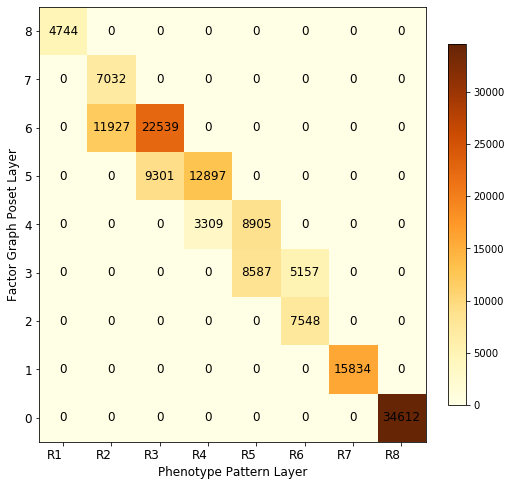

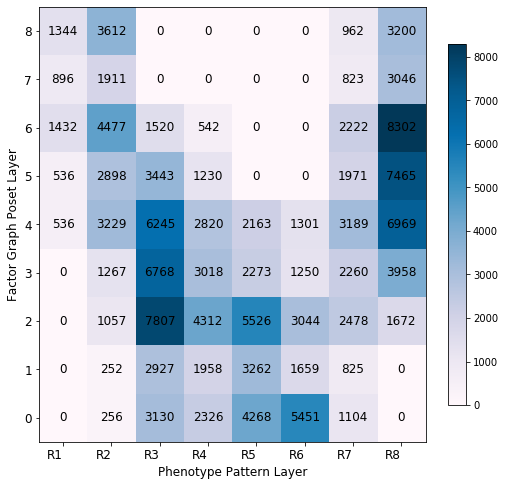

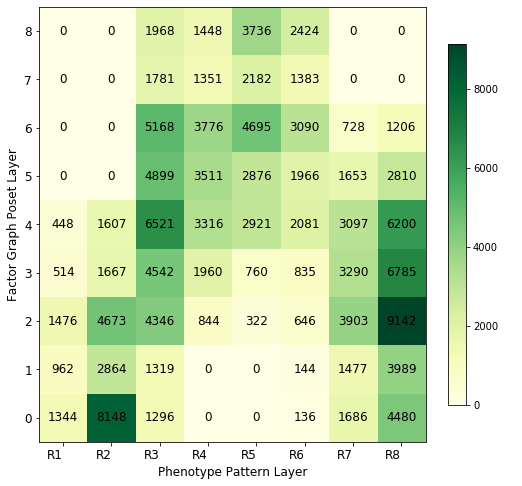

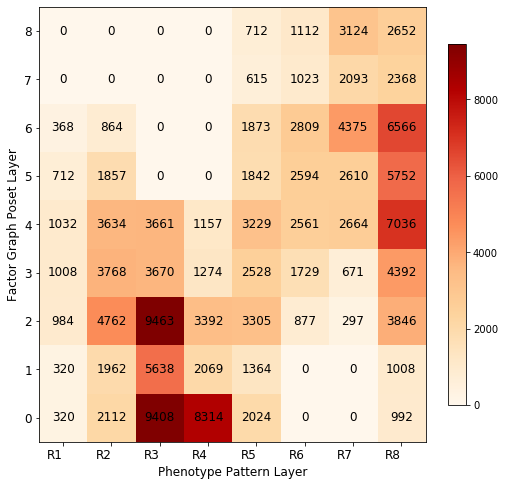

In [47]:
plot(Hb_data_Hb, Full_list, 12,12, "YlOrBr"), 
plot(Gt_data_Hb, Full_list, 12,12, "PuBu"), 
plot(Kr_data_Hb, Full_list, 12,12, "YlGn"), 
plot(Kni_data_Hb, Full_list, 20,12, "OrRd")

### Kni Gradient

In [30]:
Kni_gradient_edges = add_phenotype_Kni_gradient(database, main_edges_strict, Full_list, Full_list)

In [31]:
cond_Kni, redu_params_Kni, scc_Kni =  condensation_graph_optimized(Kni_gradient_edges)

In [43]:
cond_Kni = load_json('cond_Kni_gradient_main_edges_strict_f')

In [45]:
with open('redu_params_Kni_gradient_main_edges_strict_f') as f:
    redu_params_Kni = json.load(f)

In [46]:
redu_params_Kni_new = []
for i in redu_params_Kni:
    n = [(m[0], m[1]) for m in i]
    redu_params_Kni_new.append(n)

In [47]:
scc_Kni = load_json_scc('scc_Kni_gradient_main_edges_strict_f')

In [48]:
final_cond_dict_Kni, new_paramslist_Kni, del_list_Kni = cond_h2l_Kni_gradient(database, cond_Kni, redu_params_Kni_new)

Remember to change phenotype layer numb if needed


In [49]:
len(final_cond_dict_Kni) #numbeer of nodes in cond

123

In [50]:
for j in range(8) :   
    count = 0
    for i in final_cond_dict_Kni:
        if i[0] == j:
            count+=1
    print(j,count)

0 1
1 23
2 9
3 9
4 34
5 23
6 23
7 1


In [37]:
count = 0 #number of edges
for i in final_cond_dict_Kni:
    count+= len(final_cond_dict_Kni[i])
print(count)

407


Below is number of paths with Kni gradient imposed of length 11

In [51]:
Paths_Kni = find_all_paths(final_cond_dict_Kni, new_paramslist_Kni[0], new_paramslist_Kni[-1], 10, 500000 )

[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 99200), (5, 104000), (6, 144000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 99200), (5, 136000), (6, 144000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 99200), (5, 136000), (6, 1424000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 1379200), (5, 136000), (6, 144000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 1379200), (5, 136000), (6, 1424000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (4, 1379200), (5, 1384000), (6, 1424000), (7, 152120)]
[(0, 120), (1, 1288006), (2, 1296006), (3, 1298414), (4, 1299200), (4, 1339200), (4, 67200), (5, 96000), (5, 104000), (6, 1440

In [52]:
len(Paths_Kni)

582

In [88]:
S = flatten(Paths_Kni)
dic = []
for i in list(set(S)):
    for j in scc_Kni:
        for n in scc_Kni[j]:
            if i in n:
                dic.append(len(n))
count = 0
for i in dic:
    count+=i
print(count/2500000)

0.0696252


In [83]:
S = flatten(Paths_Kni)
dic = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
for i in list(set(S)):
    for j in scc_Kni:
        if i[0] ==j:
            for n in scc_Kni[j]:
                if i in n:
                    dic[i[0]].append(len(n))

    
dic_cond = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
for i in final_cond_dict_Kni:
    for j in scc_Kni:
        if i[0] ==j:
            for n in scc_Kni[j]:
                if i in n:
                    dic_cond[i[0]].append(len(n)) 
for i in dic:
    count = 0
    count1 = 0
    for j in dic[i]:
        count+=j
    for n in dic_cond[i]:
        count1+=n
    print(i,count/count1)


0 1.0
1 0.1826828468350279
2 0.2399228881878724
3 0.115399098672303
4 0.15393883631265334
5 0.3941182901497759
6 0.6274206975113915
7 1.0


In [53]:
for j in range(8) :   
    nodes = []
    for i in Paths_Kni:
        for n in i:
            if n[0] == j:
                nodes.append(n)
    print(j,len(set(nodes)))

0 1
1 2
2 2
3 1
4 10
5 11
6 12
7 1


In [45]:
Hb_data_Kni, Gt_data_Kni, Kr_data_Kni, Kni_data_Kni = Fullconn_get_data_scc(database, Paths_Kni, scc_Kni)

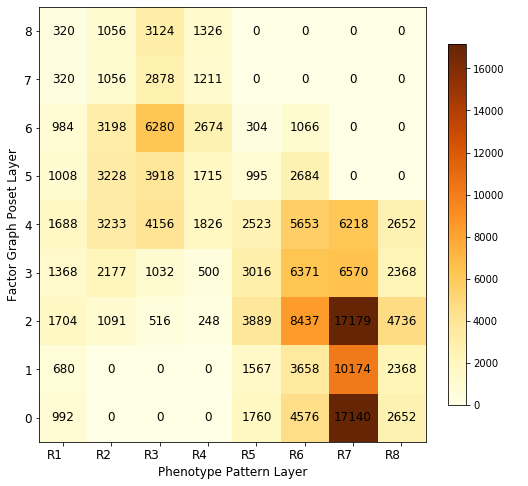

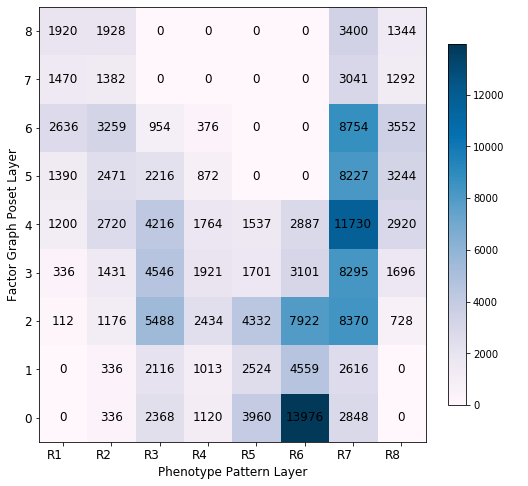

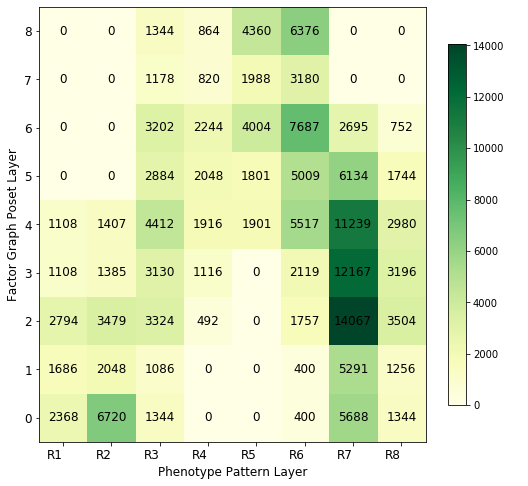

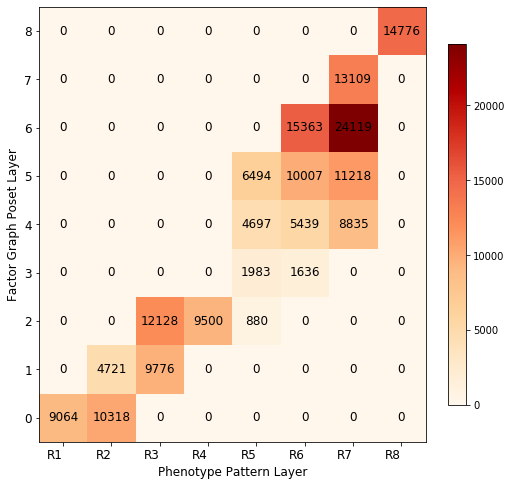

In [48]:
plot(Hb_data_Kni, Full_list, 12,12, "YlOrBr"), 
plot(Gt_data_Kni, Full_list, 12,12, "PuBu"), 
plot(Kr_data_Kni, Full_list, 12,12, "YlGn"), 
plot(Kni_data_Kni, Full_list, 20,12, "OrRd")

In [65]:
Hb_data_p, Gt_data_p, Kr_data_p, Kni_data_p = Fullconn_get_data_scc(database, Paths_og, scc_og)

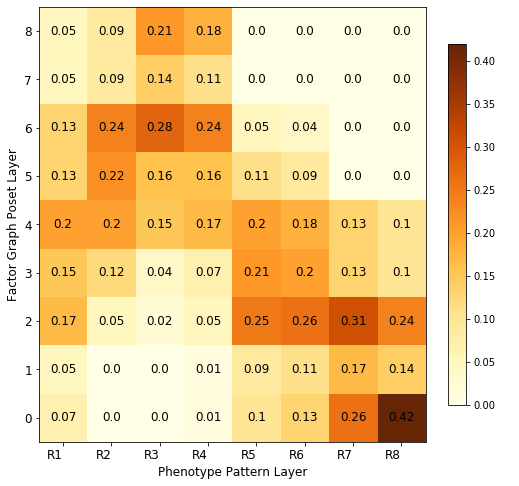

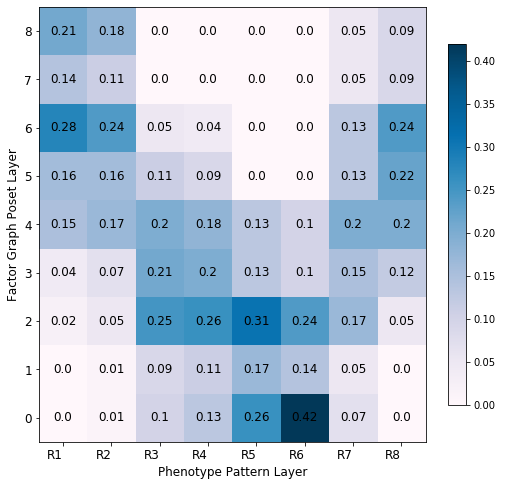

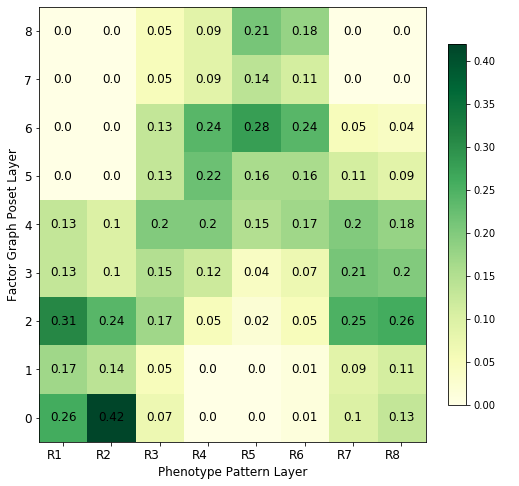

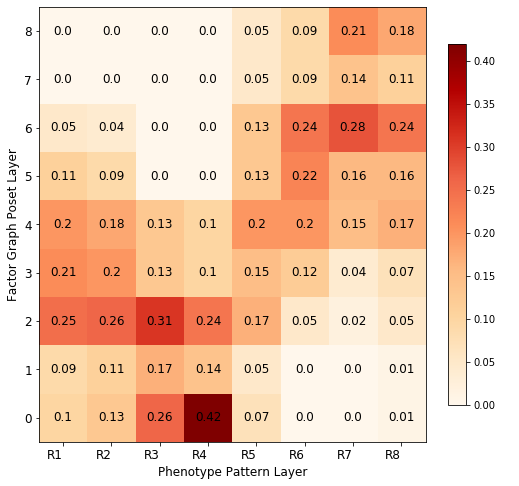

In [72]:
plot(Hb_data_p, Full_list, 12,12, 0.0405, "YlOrBr"), 
plot(Gt_data_p, Full_list, 12,12, 0.0405, "PuBu"), 
plot(Kr_data_p, Full_list, 12,12, 0.0405, "YlGn"), 
plot(Kni_data_p, Full_list, 20,12, 0.0405, "OrRd")

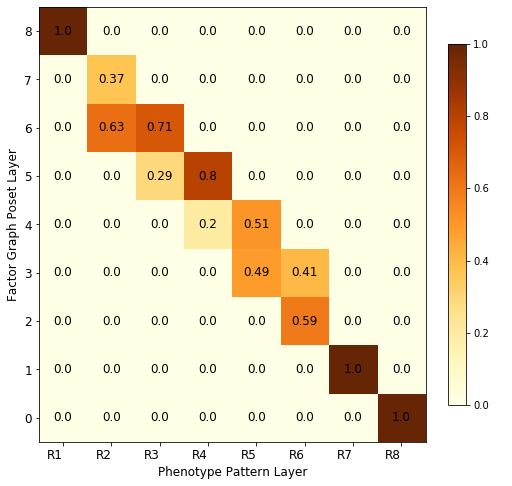

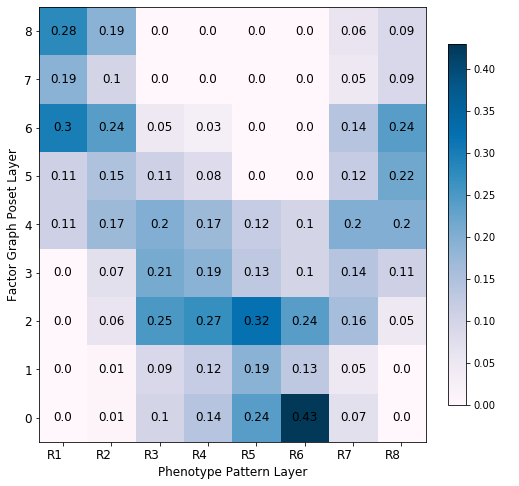

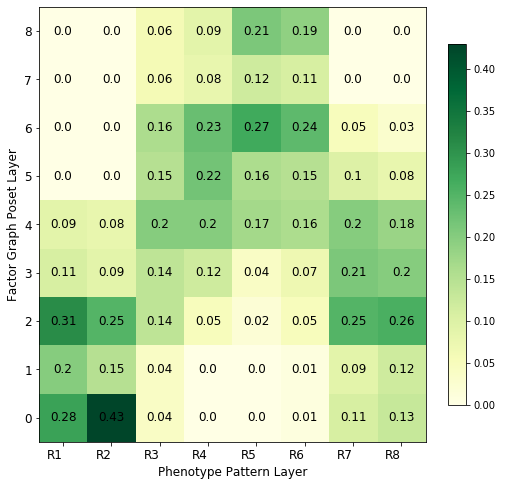

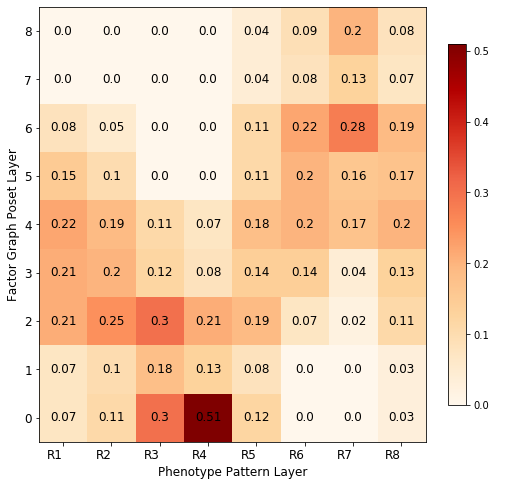

In [73]:
Hb_data_p1, Gt_data_p1, Kr_data_p1, Kni_data_p1 = Fullconn_get_data_scc(database, Paths_Hb, scc_Hb)
plot(Hb_data_p1, Full_list, 12,12, 0.0405, "YlOrBr"), 
plot(Gt_data_p1, Full_list, 12,12, 0.0405, "PuBu"), 
plot(Kr_data_p1, Full_list, 12,12, 0.0405, "YlGn"), 
plot(Kni_data_p1, Full_list, 20,12, 0.0405, "OrRd")

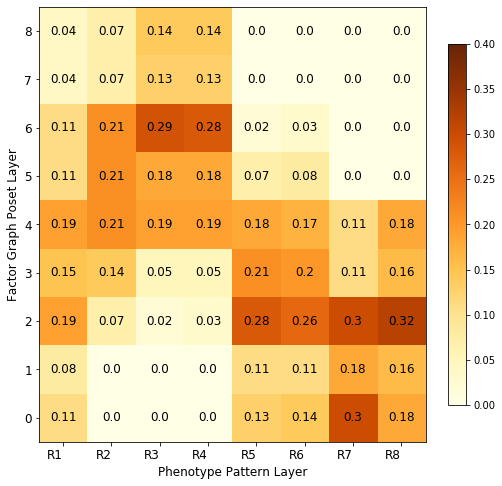

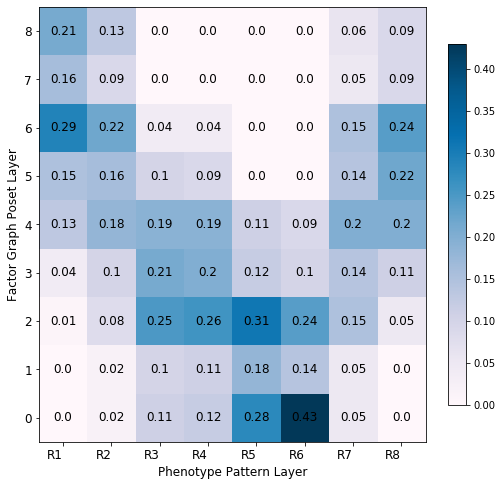

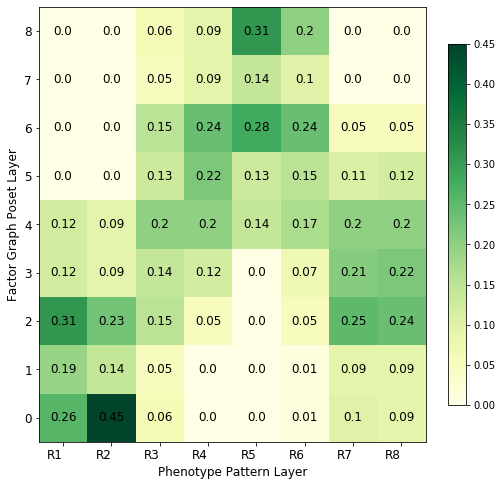

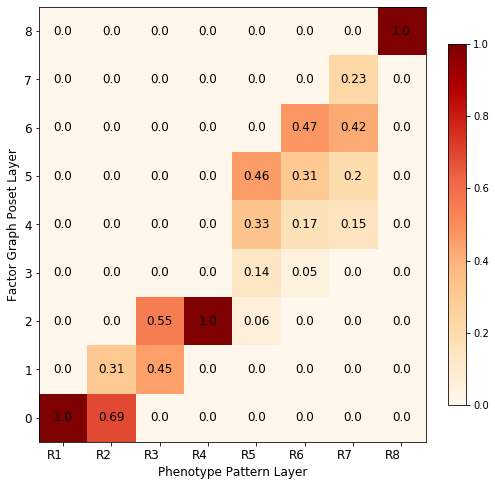

In [91]:
Hb_data_p2, Gt_data_p2, Kr_data_p2, Kni_data_p2 = Fullconn_get_data_scc(database, Paths_Kni, scc_Kni)
plot(Hb_data_p2, Full_list, 12,12, 0.0405, "YlOrBr", .4), 
plot(Gt_data_p2, Full_list, 12,12, 0.0405, "PuBu"), 
plot(Kr_data_p2, Full_list, 12,12, 0.0405, "YlGn"), 
plot(Kni_data_p2, Full_list, 20,12, 0.0405, "OrRd")

In [88]:
import DSGRN, itertools
from DSGRN import *

import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def plot(fig_data, Hex_poset, title_size, text_size, bar_val, color = "GnBu", cmax=None, fig_size = (8,8)):    
    Phenotype_layer = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']
    Hex_Poset_Layer = list(range(len(Hex_poset)-1,-1,-1))
    
    data_T = (np.array(fig_data)).transpose()
    data = np.flip(data_T,0)
    #fig = plt.figure()
    fig, ax = plt.subplots(1,1, figsize=fig_size)

    im = ax.imshow(data, cmap=color)

    # We want to show all ticks...
    ax.set_yticks(np.arange(len(Hex_Poset_Layer)))
    ax.set_xticks(np.arange(len(Phenotype_layer)))
    # ... and label them with the respective list entries
    ax.set_yticklabels(Hex_Poset_Layer, size = text_size)
    ax.set_xticklabels(Phenotype_layer, size = text_size)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    cbar = ax.figure.colorbar(im, ax=ax, cmap= color, fraction=bar_val)
    cbar.ax.set_ylabel(" ", rotation=-90, va="bottom", size = text_size)
    cbar.mappable.set_clim(0, cmax)
    # Loop over data dimensions and create text annotations.
    for i in range(len(Hex_Poset_Layer)):
        for j in range(len(Phenotype_layer )):
            text = ax.text(j, i, data[i, j],
                           ha="center", va="center", color="black", size = text_size)

    #ax.set_title("Hexcodes in scc's by Phenotype Layer", size=title_size)
    ax.set_ylabel('Factor Graph Poset Layer', size = text_size)
    ax.set_xlabel('Phenotype Pattern Layer', size = text_size)
    #fig.tight_layout()
    #fig.savefig('test.png')
    plt.show()

def Fullconn_get_data_scc(database, Paths, scc):
    
    pg = DSGRN.ParameterGraph(database.network)
    
    Full_list = {0: ['00'], 1:['40'], 2:['44','50','C0' ], 3: ['54','C4','D0'], 4: ['55','D4','CC','F0'], 5: ['D5','DC','F4'], 6: ['DD','F5','FC'], 7: ['FD'], 8:['FF']}
    path_layer_nodes = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

    for path in Paths:
        for node in path:
            if node not in path_layer_nodes[node[0]]:
                path_layer_nodes[node[0]].append(node)
    scc_list = []
    
    for i in scc:
        sub_list = []
        for j in range(len(scc[i])):

            for k in path_layer_nodes[i]:
                if k in scc[i][j]:
                    sub_list.append(j)
        if sub_list != []:
            scc_list.append(sub_list)
            
    Hb_hex = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
    Gt_hex = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
    Kr_hex = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
    Kni_hex = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

    for item in range(len(scc_list)):
        for section in scc_list[item]:
            for node in scc[item][section]:
                params = pg.parameter(node[-1])
                logic = params.logic()
                Hb = ((logic[0]).stringify())[6:-2]
                Hb_hex[node[0]].append(Hb)
                Gt = ((logic[1]).stringify())[6:-2]
                Gt_hex[node[0]].append(Gt)
                Kr = ((logic[2]).stringify())[6:-2]
                Kr_hex[node[0]].append(Kr)
                Kni = ((logic[3]).stringify())[6:-2]
                Kni_hex[node[0]].append(Kni)
                
    Hb_data = []
    Gt_data = []
    Kr_data = []
    Kni_data = []

    for n in [0, 1, 2, 3, 4, 5, 6, 7]:
        A = [round(len([i for i in Hb_hex[n] if i in Full_list[key]])/len(Hb_hex[n]),2) for key in Full_list]
        Hb_data.append(A)

    for n in [0, 1, 2, 3, 4, 5, 6, 7]:
        A = [round(len([i for i in Gt_hex[n] if i in Full_list[key]])/len(Gt_hex[n]),2) for key in Full_list]
        Gt_data.append(A)

    for n in [0, 1, 2, 3, 4, 5, 6, 7]:
        A = [round(len([i for i in Kr_hex[n] if i in Full_list[key]])/len(Kr_hex[n]),2) for key in Full_list]
        Kr_data.append(A)

    for n in [0, 1, 2, 3, 4, 5, 6, 7]:
        A = [round(len([i for i in Kni_hex[n] if i in Full_list[key]])/len(Kni_hex[n]),2) for key in Full_list]
        Kni_data.append(A)
        
    return Hb_data, Gt_data, Kr_data, Kni_data